# Application the equivalent layer technique for estimating the magnetization direction: Montes Claros complex of GAP

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'Montes_Claros_EQL_magdirection_calculation.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

#### Loading data

In [7]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [8]:
result_mclaros = dict()

### Saving files

In [9]:
saved_files = []

### airborne survey information

In [10]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


## Properties of the model

### Main field

In [11]:
inc_gf,dec_gf = data['main_field']

In [12]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Generating the layer with my function 

In [13]:
h = 392.

#### Generating a layer

In [14]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [15]:
i_pos = 1500

In [16]:
it_max = 30

In [17]:
it_marq = 15

In [18]:
lamb = 10.
dlamb = 100.

In [19]:
eps_e = 1e-4
eps_i = 1e-4

In [20]:
mu_list = [1e2,1e3,1e4,1e5,2.5*1e5,5*1e5,7.5*1e5,1e6]

In [21]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_40'],data['x'],data['y'],
        data['z'],xs,ys,zs,inc_gf,dec_gf,-70.,50.,lamb,dlamb,i_pos,it_max,it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_40'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-68.39536279952381 47.32119885268746
0.005050050518637953
i = 1
-66.90803537608917 45.30231417123803
0.0042720979411606935
i = 2
-65.52989626561119 43.749070593218825
0.0036552923514849753
i = 3
-64.24758055672451 42.52428570626289
0.0031860972203973568
i = 4
-63.03773356635863 41.55012316559586
0.0028528857255169216
i = 5
-61.89071943199332 40.776058476738136
0.0025840899428510727
i = 6
-60.804514297813526 40.155599491244146
0.0023512832812506296
i = 7
-59.77346279430274 39.65501006326463
0.0021577948935676025
i = 8
-58.79447867746318 39.249583511732766
0.0019869122975784176
i = 9
-57.86676442745683 38.9254402459335
0.001822614125192711
i = 10
-56.989498796030155 38.67061666208295
0.0016649884389033718
i = 11
-56.15657225111962 38.471053260955365
0.0015352892991592473
i = 12
-55.367904353914135 38.32002975601221
0.001407489882683818
i = 13
-54.619618439937554 38.21013994966514
0.0012957344242360575
i = 14
-53.90646031597706 38.13709726717287
0.0012030636542436541
i = 15
-53.2246

-59.131235000255714 38.92018631343487
0.001632403960420839
i = 9
-58.242820212069695 38.55852430508105
0.001487544047878654
i = 10
-57.4032557196175 38.26637213685053
0.0013525249548078776
i = 11
-56.60776545494359 38.03136211561046
0.0012371234245065399
i = 12
-55.85395257411327 37.84549639822178
0.0011317509043966278
i = 13
-55.1393151391572 37.70138632237693
0.001036668582545682
i = 14
-54.46116921330312 37.594718822035475
0.0009508234247604607
i = 15
-53.81502964556851 37.522137202461316
0.0008787675036251669
i = 16
-53.19827764933785 37.47874951715326
0.0008155588293124994
i = 17
-52.609355579123054 37.46007102901509
0.0007579200789371421
i = 18
-52.046840358301125 37.462493920762604
0.0007050565406380399
i = 19
-51.50935770786147 37.48295793312735
0.000656541181976774
i = 20
-50.99334902571864 37.52138148633221
0.0006172310502682654
i = 21
-50.497050580652775 37.57561629670757
0.0005827329711715786
i = 22
-50.01943111583567 37.643447693097684
0.0005510856433164921
i = 23
-49.5594

## L-curve visualization

/home/vanderlei/anaconda3/envs/fatiando2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


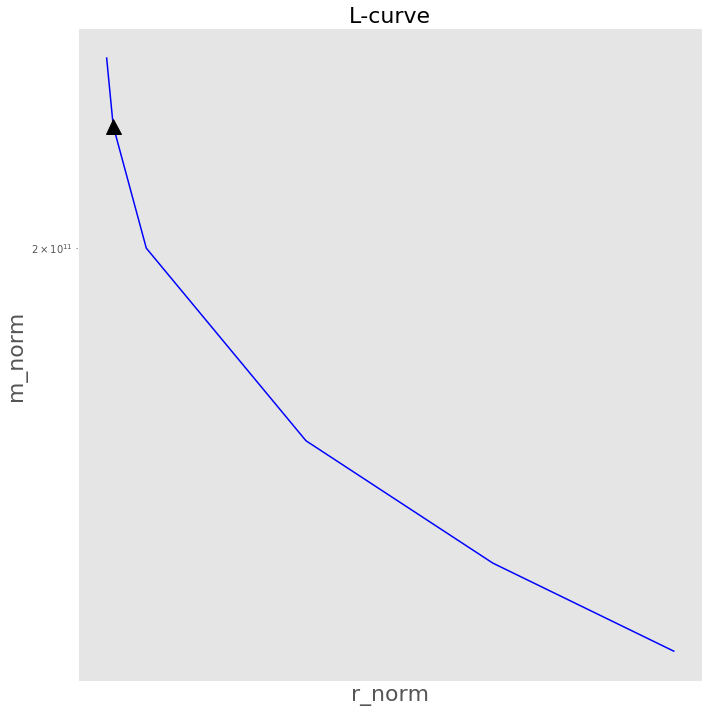

In [22]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.loglog(norm_r,norm_m, 'b-')
plt.plot(norm_r[3],norm_m[3], 'k^',markersize=15)
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

file_name = 'figs/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [23]:
result_mclaros['magnetic_moment'] = m_est
result_mclaros['inc_est'] = incl_est
result_mclaros['dec_est'] = decl_est
result_mclaros['layer_depth'] = h
result_mclaros['reg_parameter'] = mu_list
result_mclaros['phi'] = phi_list

### Generating .pickle file

In [24]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_mclaros['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [25]:
file_name = 'data/result_mclaros.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_mclaros, f)
    
saved_files.append(file_name)

### Saved files

In [26]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Lcurve_RM.png
2  figs/Lcurve_RM.eps
3  data/result_mclaros.pickle
